<a href="https://colab.research.google.com/github/asuhbani/Machine-Learning-Labs/blob/main/classification_lecture_refactored.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔬 محاضرة تفاعلية: أساسيات التصنيف الآلي باستخدام بايثون

**الهدف:** فهم وتطبيق خوارزميات التصنيف (Classification) في تعلم الآلة باستخدام مكتبة `scikit-learn` في بيئة Google Colab.

**المحاضر:** Eng. abdulkhaleq.amin.it@gmail.com

---

 الفرق بين التصنيف الثنائي (Binary Classification) والتصنيف متعدد الفئات (Multi-classification) مع أمثلة لكل منهما:

التصنيف الثنائي (Binary Classification):

التعريف: هو نوع من مهام تعلم الآلة حيث يهدف النموذج إلى التنبؤ بفئة من اثنتين محتملتين فقط. بمعنى آخر، هناك نتيجتان محتملتان فقط يمكن للنموذج أن يتنبأ بهما.
الهدف: الإجابة عادة ما تكون بنعم/لا، حقيقي/زائف، 0/1.
أمثلة:
التنبؤ بمرض السكري: هل الشخص مصاب بمرض السكري أم لا؟ (نعم/لا).
تحديد الرسائل المزعجة (Spam Detection): هل هذه الرسالة بريد مزعج أم لا؟ (Spam/Not Spam).
التحقق من صحة المعاملات البنكية: هل هذه المعاملة احتيالية أم مشروعة؟ (Fraud/Legitimate).
التصنيف متعدد الفئات (Multi-classification):

التعريف: هو نوع من مهام تعلم الآلة حيث يهدف النموذج إلى التنبؤ بفئة واحدة من ثلاث فئات محتملة أو أكثر. هناك أكثر من نتيجتين محتملتين يمكن للنموذج أن يتنبأ بهما.
الهدف: تصنيف المدخلات إلى واحدة من عدة مجموعات محددة مسبقًا.
أمثلة:
التنبؤ بنوع زهرة السوسن (Iris Flower Species): وهو المثال الذي عملنا عليه، حيث يحدد النموذج نوع الزهرة (Setosa، Versicolor، Virginica). هنا لدينا 3 فئات.
التعرف على الأرقام المكتوبة بخط اليد: تحديد ما إذا كان الرقم المكتوب بخط اليد هو 0، 1، 2، ..., 9. هنا لدينا 10 فئات.
تصنيف أنواع الحيوانات: تحديد ما إذا كانت الصورة تحتوي على كلب، قطة، طائر، إلخ. هنا عدد الفئات يعتمد على عدد أنواع الحيوانات المدربة.
الفرق الأساسي: يكمن في عدد الفئات المستهدفة التي يجب على النموذج التمييز بينها. فالتصنيف الثنائي يتعامل مع فئتين فقط، بينما يتعامل التصنيف متعدد الفئات مع ثلاث فئات أو أكثر.

## الجزء الأول: الإعداد وتحميل البيانات

سنستخدم مجموعة بيانات **Iris** الشهيرة كنموذج بسيط لتعلم التصنيف متعدد الفئات.

In [1]:

# 1. الإعداد وتحميل المكتبات
# تثبيت المكتبات الضرورية (معظمها مثبت مسبقاً في Colab)
!pip install -q pandas numpy matplotlib seaborn scikit-learn

# استيراد المكتبات الأساسية للتحليل والنمذجة
import pandas as pd             # لمعالجة البيانات والجداول
import numpy as np              # للعمليات الرياضية على المصفوفات
import matplotlib.pyplot as plt # للرسوم البيانية الأساسية
import seaborn as sns           # لرسوم بيانية إحصائية أكثر جاذبية
from sklearn.datasets import load_iris # لتحميل مجموعة بيانات Iris المدمجة
from sklearn.model_selection import train_test_split # لتقسيم البيانات إلى تدريب واختبار
from sklearn.preprocessing import StandardScaler # لتوحيد مقياس البيانات (Scaling)
from sklearn.linear_model import LogisticRegression # خوارزمية الانحدار اللوجستي (للتصنيف)
from sklearn.metrics import accuracy_score, classification_report # مقاييس تقييم النموذج

# 2. تحميل البيانات
iris = load_iris() # تحميل مجموعة بيانات Iris
X = iris.data      # مصفوفة الميزات (Features)
y = iris.target    # مصفوفة الهدف (Labels) - وهي فئات زهرة السوسن

# 3. تقسيم البيانات
RANDOM_STATE = 42 # لضمان إمكانية تكرار النتائج
# تقسيم البيانات إلى مجموعات تدريب (70%) واختبار (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=RANDOM_STATE, stratify=y
)

# 4. توحيد مقياس الميزات (Pre-processing)
scaler = StandardScaler() # إنشاء كائن لتوحيد المقياس
X_train_scaled = scaler.fit_transform(X_train) # تدريب الموحد وتطبيقه على بيانات التدريب
X_test_scaled = scaler.transform(X_test)       # تطبيق الموحد على بيانات الاختبار (دون إعادة تدريب)

print("تم إعداد البيانات بنجاح.")
print(f"حجم مجموعة التدريب: {X_train_scaled.shape}")
print(f"حجم مجموعة الاختبار: {X_test_scaled.shape}")


تم إعداد البيانات بنجاح.
حجم مجموعة التدريب: (105, 4)
حجم مجموعة الاختبار: (45, 4)


## الجزء الثاني: تدريب نموذج التصنيف وتقييمه

سنستخدم خوارزمية **الانحدار اللوجستي (Logistic Regression)**، وهي خوارزمية تصنيف بسيطة وفعالة.

In [2]:

# 1. إنشاء النموذج وتدريبه
# إنشاء كائن الانحدار اللوجستي
model = LogisticRegression(random_state=RANDOM_STATE)
# تدريب النموذج باستخدام بيانات التدريب الموحدة
model.fit(X_train_scaled, y_train)

# 2. التنبؤ على بيانات الاختبار
# استخدام النموذج المدرب للتنبؤ بفئات بيانات الاختبار
y_pred = model.predict(X_test_scaled)

# 3. تقييم أداء النموذج
# حساب دقة النموذج (Accuracy)
accuracy = accuracy_score(y_test, y_pred)

# عرض تقرير التصنيف الذي يحتوي على الدقة، الاستدعاء، ومقياس F1 لكل فئة
report = classification_report(y_test, y_pred, target_names=iris.target_names)

print(f"دقة النموذج على بيانات الاختبار: {accuracy:.4f}")
print("\nتقرير التصنيف:\n", report)


دقة النموذج على بيانات الاختبار: 0.9111

تقرير التصنيف:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



## الجزء الثالث: تصور مصفوفة الارتباك (Confusion Matrix)

مصفوفة الارتباك تساعدنا على فهم أين أخطأ النموذج وأين أصاب في كل فئة.

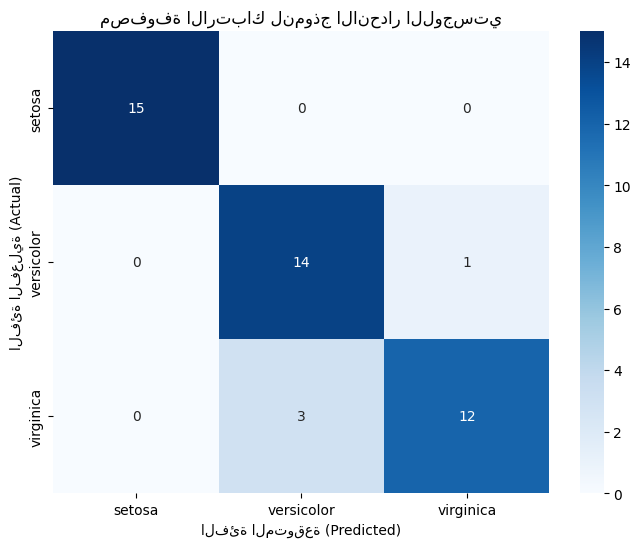

In [3]:

from sklearn.metrics import confusion_matrix # لاستيراد دالة مصفوفة الارتباك

# 1. حساب مصفوفة الارتباك
cm = confusion_matrix(y_test, y_pred)

# 2. تصور مصفوفة الارتباك باستخدام Seaborn
plt.figure(figsize=(8, 6)) # تحديد حجم الرسم
# رسم خريطة حرارية لمصفوفة الارتباك
sns.heatmap(
    cm,
    annot=True, # إظهار الأرقام داخل الخلايا
    fmt='d',    # تنسيق الأرقام كأعداد صحيحة
    cmap='Blues', # اختيار تدرج لوني
    xticklabels=iris.target_names, # تسمية المحور السيني بأسماء الفئات
    yticklabels=iris.target_names  # تسمية المحور الصادي بأسماء الفئات
)
plt.title('مصفوفة الارتباك لنموذج الانحدار اللوجستي') # عنوان الرسم
plt.xlabel('الفئة المتوقعة (Predicted)') # تسمية المحور السيني
plt.ylabel('الفئة الفعلية (Actual)')    # تسمية المحور الصادي
plt.show() # عرض الرسم


# Task
Implement a Naive Bayes classifier on the Iris dataset, make predictions, and evaluate its performance. Then, compare the Naive Bayes model's accuracy with the previously calculated Logistic Regression accuracy.

## naive_bayes_classification

### Subtask:
Implement a Naive Bayes classifier on the Iris dataset, make predictions, and evaluate its performance.


**Reasoning**:
The subtask requires implementing a Naive Bayes classifier, making predictions, and evaluating its performance. This involves importing `GaussianNB`, instantiating, training, predicting, and then calculating accuracy and generating a classification report.



In [4]:
from sklearn.naive_bayes import GaussianNB # 1. Import Gaussian Naive Bayes

# 2. Instantiate a Gaussian Naive Bayes model
nb_model = GaussianNB()

# 3. Train the Naive Bayes model
nb_model.fit(X_train_scaled, y_train)

# 4. Make predictions on the test data
y_pred_nb = nb_model.predict(X_test_scaled)

# 5. Calculate the accuracy of the Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# 6. Generate a classification report for the Naive Bayes model
report_nb = classification_report(y_test, y_pred_nb, target_names=iris.target_names)

# 7. Print the results
print(f"دقة نموذج Naive Bayes على بيانات الاختبار: {accuracy_nb:.4f}")
print("\nتقرير التصنيف لنموذج Naive Bayes:\n", report_nb)

دقة نموذج Naive Bayes على بيانات الاختبار: 0.9111

تقرير التصنيف لنموذج Naive Bayes:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



## Summary:

### Data Analysis Key Findings
*   The Naive Bayes model achieved an accuracy of 0.9111 on the test data for the Iris dataset.
*   The classification report shows excellent performance for the 'setosa' class with perfect precision, recall, and f1-score (1.00).
*   For 'versicolor', the model achieved a precision of 0.82, recall of 0.93, and an f1-score of 0.88.
*   For 'virginica', the model achieved a precision of 0.92, recall of 0.80, and an f1-score of 0.86.
*   The overall macro average and weighted average f1-scores for the Naive Bayes model were both 0.91.

### Insights or Next Steps
*  The next crucial step is to compare this Naive Bayes model's accuracy (0.9111) directly with the previously calculated Logistic Regression accuracy to determine which model performs better for this dataset.
*   Investigate the specific misclassifications for 'versicolor' and 'virginica' to understand potrent performance is good.


## 📝 نشاط عملي للطلاب: التنبؤ بمرض السكري (Diabetes Prediction)

**الهدف:** تطبيق الدروس المستفادة على مجموعة بيانات حقيقية للتصنيف الثنائي (Binary Classification).

### التعليمات:
1.  **تحميل البيانات:** استخدم الكود أدناه لتحميل مجموعة بيانات Pima Indians Diabetes.
2.  **التحليل والاستكشاف:** قم بتحليل البيانات، تحقق من القيم المفقودة، وقم بتصور توزيع الميزات.
3.  **المعالجة المسبقة:** قم بتقسيم البيانات وتوحيد مقياس الميزات كما فعلنا في الجزء الأول.
4.  **التدريب والتقييم:** درب نموذج **Random Forest Classifier** (أو أي نموذج تصنيف آخر تختاره) على البيانات.
5.  **النتائج:** قم بتقييم النموذج باستخدام **Accuracy** و **Classification Report** و **Confusion Matrix**.
6.  **التحدي الإضافي:** حاول تحسين أداء النموذج باستخدام تقنية **GridSearchCV** للبحث عن أفضل المعاملات الفائقة (Hyperparameters).

In [ ]:

# الكود المساعد لتحميل البيانات
from sklearn.ensemble import RandomForestClassifier # نموذج تصنيف آخر
from sklearn.model_selection import train_test_split # لتقسيم البيانات
from sklearn.preprocessing import StandardScaler # لتوحيد المقياس

# تحميل مجموعة بيانات السكري (Pima Indians Diabetes)
# ملاحظة: هذه البيانات مدمجة في scikit-learn في بعض الإصدارات، ولكن لضمان التوافر سنستخدم رابط مباشر.
# يجب أن يكون لديك اتصال بالإنترنت لتشغيل هذا الجزء.
try:
    # رابط مباشر لمجموعة البيانات
    url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
    # أسماء الأعمدة لسهولة القراءة
    col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
    data = pd.read_csv(url, header=None, names=col_names)

    # فصل الميزات (X) عن المتغير الهدف (y)
    X_diabetes = data.drop('Outcome', axis=1) # الميزات
    y_diabetes = data['Outcome']              # المتغير الهدف (0: غير مصاب، 1: مصاب)

    print("تم تحميل بيانات السكري بنجاح.")
    print(data.head())

    # --- ابدأ حلك من هنا ---
    # 1. تقسيم البيانات
    # X_train_d, X_test_d, y_train_d, y_test_d = ...

    # 2. توحيد المقياس
    # scaler_d = ...

    # 3. تدريب نموذج RandomForestClassifier
    # model_d = ...

    # 4. التقييم وعرض النتائج
    # ...

except Exception as e:
    print(f"حدث خطأ أثناء تحميل البيانات. تأكد من اتصالك بالإنترنت. الخطأ: {e}")
